<a href="https://colab.research.google.com/github/parvathi27/Medicine_side_effect_classification/blob/main/MedicineSideEffectClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection  import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [ ]:
import sys
import warnings
if not sys.warnoptions:
  warnings.Simplefilter("ignore")

In [ ]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
xg=XGBClassifier()
lr=LogisticRegression(max_iter=500)
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC(kernel='rbf',probability=True)
gnb=GaussianNB()
bnb=BernoulliNB()

In [ ]:
%matplotlib inline

In [ ]:
data=pd.read_excel('/content/Data_SideeffectClassification.xlsx')

In [ ]:
data.head()

,Patient_id,SYMPTOM1,AGE_YRS,SEX
0,916600,Dysphagia,33.0,F
1,916601,Anxiety,73.0,F
2,916602,Chest discomfort,23.0,F
3,916603,Dizziness,58.0,F
4,916604,Injection site erythema,47.0,F


In [ ]:
data.shape

(399999, 4)

In [ ]:
data.columns

Index(['Patient_id', 'SYMPTOM1', 'AGE_YRS', 'SEX'], dtype='object')

In [ ]:
data.isna().sum()

Patient_id        0
SYMPTOM1          0
AGE_YRS       29965
SEX               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Patient_id  399999 non-null  int64  
 1   SYMPTOM1    399999 non-null  object 
 2   AGE_YRS     370034 non-null  float64
 3   SEX         399999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 12.2+ MB


In [ ]:
data['SYMPTOM1'].value_counts()

Chills                           30880
Arthralgia                       17478
Dizziness                        16186
Injection site erythema          13424
Fatigue                          12615
                                 ...  
Gallbladder necrosis                 1
Mucosal disorder                     1
Tongue thrust                        1
Rash maculovesicular                 1
Electrocardiogram QT interval        1
Name: SYMPTOM1, Length: 4803, dtype: int64

In [ ]:
data['AGE_YRS'].median()

49.0

In [ ]:
if (data['AGE_YRS'].skew(axis=0,skipna=True)>1) or (data['AGE_YRS'].skew(axis=0,skipna=True)<(-1)):
    data['AGE_YRS']=data['AGE_YRS'].fillna(data['AGE_YRS'].median())                            
else:
    data['AGE_YRS']=data['AGE_YRS'].fillna(data['AGE_YRS'].mean())

In [ ]:
data.isna().sum()

Patient_id    0
SYMPTOM1      0
AGE_YRS       0
SEX           0
dtype: int64

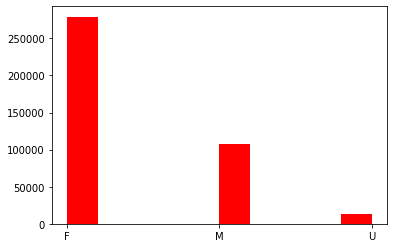

In [ ]:
plt.hist(data['SEX'],color='red')
plt.show()

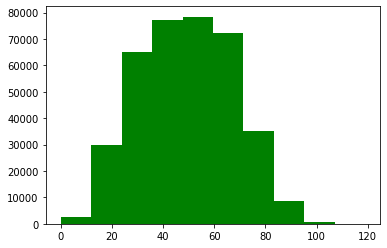

In [ ]:
plt.hist(data['AGE_YRS'],color='green')
plt.show()

In [ ]:
data.drop('Patient_id',axis=1,inplace=True)

In [ ]:
df1=data.groupby("SYMPTOM1").filter(lambda g: g.SYMPTOM1.size >=10000)

In [ ]:
df1['SYMPTOM1'].value_counts()

Chills                     30880
Arthralgia                 17478
Dizziness                  16186
Injection site erythema    13424
Fatigue                    12615
Headache                   11620
Name: SYMPTOM1, dtype: int64

In [ ]:
df1.head()

,SYMPTOM1,AGE_YRS,SEX
3,Dizziness,58.0,F
4,Injection site erythema,47.0,F
5,Chills,40.0,M
20,Injection site erythema,65.0,M
22,Chills,22.0,F


In [ ]:
df2=data.groupby("SYMPTOM1").filter(lambda g: (g.SYMPTOM1.size <10000) and (g.SYMPTOM1.size >= 1000))

        

In [ ]:
df2['SYMPTOM1'].value_counts()

Pyrexia                  9516
Asthenia                 9356
Erythema                 8218
Pain                     7380
Pain in extremity        6009
                         ... 
Dysphagia                1055
Rash erythematous        1045
Dysgeusia                1037
Palpitations             1034
Anaphylactic reaction    1021
Name: SYMPTOM1, Length: 65, dtype: int64

In [ ]:
df1.head()

,Patient_id,SYMPTOM1,AGE_YRS,SEX,side_effect
3,916603,Dizziness,58.0,F,Mild
4,916604,Injection site erythema,47.0,F,Mild
5,916605,Chills,40.0,M,Mild
20,916615,Injection site erythema,65.0,M,Mild
22,916617,Chills,22.0,F,Mild


In [ ]:
for i in range(df1.shape[0]):
    df1['side_effect']='Mild'

In [ ]:
df2['SYMPTOM1'].unique()

array(['Dysphagia', 'Anxiety', 'Chest discomfort', 'Pyrexia',
       'Abdominal pain', 'Diarrhoea', 'Rash', 'Dyspnoea', 'Nausea',
       'Abdominal pain upper', 'Blood pressure increased',
       'Unevaluable event', 'Injection site pain', 'Tremor', 'Erythema',
       'Cough', 'Asthenia', 'Pain in extremity', 'Vomiting', 'Back pain',
       'Injection site swelling', 'Body temperature increased',
       'Hypoaesthesia', 'Flushing', 'Pruritus', 'Burning sensation',
       'Paraesthesia', 'Anaphylactic reaction', 'Axillary pain',
       'Lymphadenopathy', 'Myalgia', 'No adverse event',
       'Feeling abnormal', 'Pain', 'Urticaria', 'Feeling hot', 'Tinnitus',
       'Injection site warmth', 'Heart rate increased', 'Death',
       'Dysgeusia', 'Peripheral swelling', 'Condition aggravated',
       'Ageusia', 'Injection site pruritus', 'Blood test', 'Malaise',
       'Rash erythematous', 'Abdominal discomfort', 'Hyperhidrosis',
       'Syncope', 'Injection site rash', 'Decreased appetite', 

In [ ]:

list1=['Pain','Pain in extremity','Palpitations','No adverse event','Unevaluable event','Injection site pain','Injection site swelling','Injection site warmth']
list2=['Death']


In [ ]:
def myfunc(symptom):
    if symptom in list1:
        return 'No_side_effect'
    elif symptom in list2:
        return 'Severe'
    else:
        return 'Moderte'


In [ ]:
df2['side_effect'] = df2.apply(lambda x: myfunc(x['SYMPTOM1']), axis=1)



In [ ]:
df2['side_effect'].value_counts()

Moderte           146325
No_side_effect     26885
Severe              1804
Name: side_effect, dtype: int64

In [ ]:
df3=data.groupby("SYMPTOM1").filter(lambda g: g.SYMPTOM1.size <1000)

In [ ]:
df3['SYMPTOM1'].value_counts()

Loss of consciousness                     998
Injection site reaction                   961
Paraesthesia oral                         959
Balance disorder                          958
Cold sweat                                939
                                         ... 
Angiokeratoma                               1
Jaw fracture                                1
Blood pressure inadequately controlled      1
Staphylococcal bacteraemia                  1
Endocrine ophthalmopathy                    1
Name: SYMPTOM1, Length: 4732, dtype: int64

In [ ]:
df3['SYMPTOM1'].unique()

array(['Pharyngeal swelling', 'Vaccination site erythema',
       'Blood pressure decreased', ..., 'Bronchial secretion retention',
       'Drug withdrawal syndrome', 'Coronary angioplasty'], dtype=object)

In [ ]:
for i in range(df3.shape[0]):
    df3['side_effect']='Severe'

In [ ]:
df3.shape

(122782, 4)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102203 entries, 3 to 399998
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SYMPTOM1  102203 non-null  object 
 1   AGE_YRS   102203 non-null  float64
 2   SEX       102203 non-null  object 
dtypes: float64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
df_med=pd.concat([df1,df2,df3],axis=0,ignore_index=True)

In [ ]:
df_med['side_effect'].value_counts()

Moderte           146325
Severe            124586
Mild              102203
No_side_effect     26885
Name: side_effect, dtype: int64

In [ ]:
df_med.to_csv('df_med_data.csv',index=False)

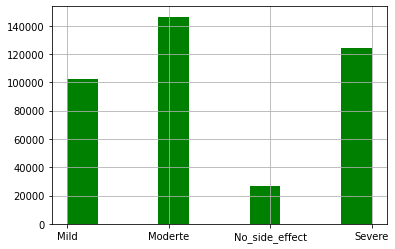

In [ ]:
df_med['side_effect'].hist(color='green')
plt.show()

In [ ]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SYMPTOM1     399999 non-null  object 
 1   AGE_YRS      399999 non-null  float64
 2   SEX          399999 non-null  object 
 3   side_effect  399999 non-null  object 
dtypes: float64(1), object(3)
memory usage: 12.2+ MB


In [ ]:
datacol=['SYMPTOM1']

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [ ]:
for i in datacol:
    df_med[i]=le.fit_transform(df_med[i])

In [ ]:
df_med['side_effect']=df_med['side_effect'].map({'No_side_effect':0,'Mild':1,'Moderte':2,'Severe':3})

In [ ]:
df_med['SEX']=pd.get_dummies(df_med['SEX'])

In [ ]:
df_med.head()

,SYMPTOM1,AGE_YRS,SEX,side_effect
0,1654,58.0,1,1
1,2581,47.0,1,1
2,1276,40.0,0,1
3,2581,65.0,0,1
4,1276,22.0,1,1


In [ ]:
df_med['side_effect'].value_counts()

2    146325
3    124586
1    102203
0     26885
Name: side_effect, dtype: int64

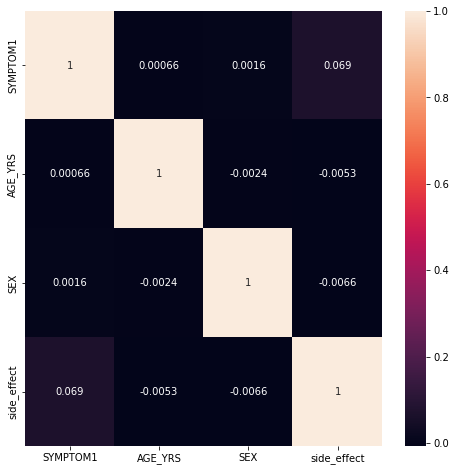

In [ ]:
plt.figure(figsize=(8,8))
corr_mat=df_med.corr()
sns.heatmap(corr_mat,annot=True)

In [ ]:
x=df_med.drop('side_effect',axis=1)
y=df_med['side_effect']
#y=pd.DataFrame(y)

In [ ]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()

# Function to fit different models


In [ ]:
def model(y_data,mod_name,scale_name):
  x=y_data.drop(['side_effect'],axis=1)
  y=y_data['side_effect']
  #X_smot,y_smot=smot.fit_resample(x,y)
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)
  
  if scale_name==norm:
    #x_train=pd.DataFrame(x_train)
    #x_test=pd.DataFrame(x_test)
    x_train=norm(x_train)
    x_test=norm(x_test)
  else:
    scale_name.fit(x_train)
    x_train=scale_name.transform(x_train)
    x_test=scale_name.transform(x_test)
  mod_name.fit(x_train,y_train)
  mod_prob=mod_name.predict_proba(x_test)
  y_pred=mod_name.predict(x_test)
  return confusion_matrix(y_test,y_pred),y_pred,mod_prob,print(classification_report(y_test,y_pred))

In [ ]:
sc=StandardScaler()

In [ ]:
results_dict={}
model_name=[lr,dt,rf,knn,bnb,gnb,xg]
for name in model_name:
  #rf=RandomForestClassifier(n_estimators=50+i)
  cfm,y_pred,y_prob,c=model(df_med,name,sc)
  results_dict[name]=cfm
  #cfm_percentages = (cfm.flatten()/np.sum(cfm) *100).reshape(2,2)
  #sns.heatmap(cfm_percentages, annot=True, cmap='BuPu_r')  
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

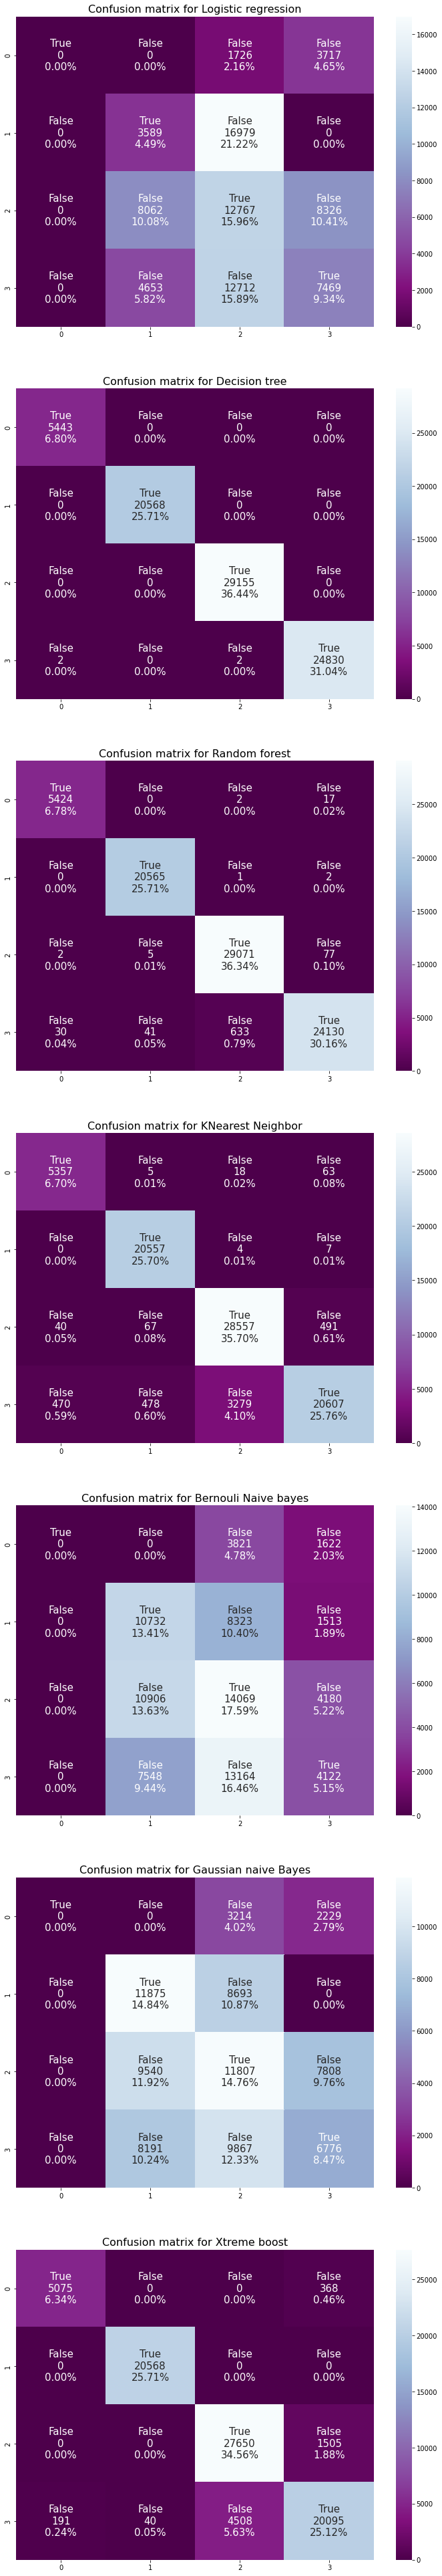

In [ ]:
group_names = ['True','False','False','False','False','True','False','False','False','False','True','False','False','False','False','True']
titles=['Logistic regression','Decision tree','Random forest','KNearest Neighbor','Bernouli Naive bayes','Gaussian naive Bayes','Xtreme boost']
nrows=len(model_name)
f, axes = plt.subplots(nrows,1,figsize=(12,10*nrows));

for i,ax in enumerate(axes.flatten()):
    ckey = list(results_dict.keys())[i]
    #computing variables for specific confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in results_dict[ckey].flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in results_dict[ckey].flatten()/np.sum(results_dict[ckey])]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(4,4)
    
    #plotting confusion matrix
    sns.heatmap(results_dict[ckey], annot=labels,annot_kws={'size': 15}, fmt='', cmap='BuPu_r', ax=ax,)
    ax.set_title(f"Confusion matrix for {titles[i]}",fontdict={'fontsize':16,'fontweight':10})
    

In [ ]:
cfm,y_pred,y_prob,c=model(df_med,dt,sc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5443
           1       1.00      1.00      1.00     20568
           2       1.00      1.00      1.00     29155
           3       1.00      1.00      1.00     24834

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



str

In [ ]:
 dt_cm = pd.DataFrame(results_dict[dt],
                     index = ['no_sideeffect','mild','moderate','Severe'], 
                     columns = ['no_sideeffect','mild','moderate','Severe'])

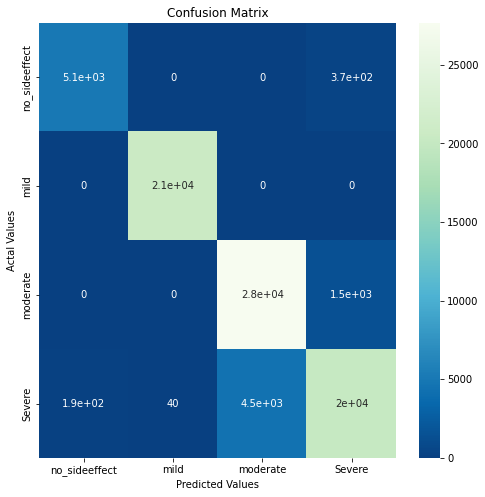

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))

sns.heatmap(dt_cm, annot=True,cmap='GnBu_r')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
def scale_type(s_name,y_data):
   x=y_data.drop(['side_effect'],axis=1)
   y=y_data['side_effect']
   
   x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)
   if s_name==norm:
    #x_train=pd.DataFrame(x_train)
    #x_test=pd.DataFrame(x_test)
    x_train=norm(x_train)
    x_test=norm(x_test)
   else:
    s_name.fit(x_train)
    x_train=s_name.transform(x_train)
    x_test=s_name.transform(x_test)
   return x_train,x_test,y_train,y_test

# KNN

In [ ]:
#finding k-value
x_train,x_test,y_train,y_test=scale_type(sc,df_med)        # give scaler name and dataset name
error_rate=[]
for i in range(1,10):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'error_rate')

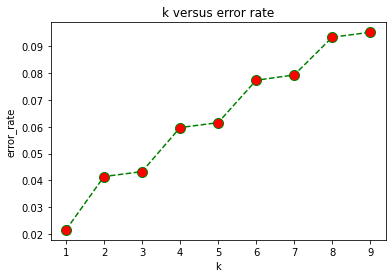

In [ ]:
plt.plot(range(1,10),error_rate,color='green',linestyle='--',markersize=10,markerfacecolor='red',marker='o')
plt.title('k versus error rate')
plt.xlabel('k')
plt.ylabel('error_rate')

In [ ]:
from sklearn import model_selection
from sklearn.metrics import f1_score

LR: 0.294417 (0.002348)
RF: 0.986994 (0.000806)
KNN: 0.832859 (0.001628)
CART: 0.999922 (0.000051)
XGB: 0.931078 (0.004412)


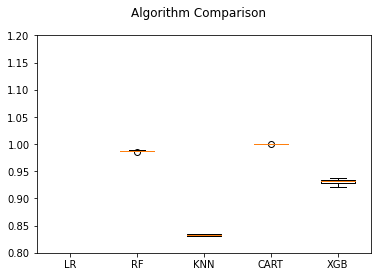

In [ ]:
x_train,x_test,y_train,y_test=scale_type(sc,df_med)
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=20)))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(kernel='rbf',probability=True)))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=None)
  cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ybound(0.8,1.2)
plt.show()
   

# Precision Recall curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

In [ ]:
x=df_med.drop('side_effect',axis=1)
y=df_med['side_effect']
y = y.astype(np.uint8)
n_classes = len(set(y))
target=df_med['side_effect']
Y = label_binarize(target, classes=[*range(n_classes)])

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    Y,
                                                    random_state = 42)

clf = OneVsRestClassifier(rf)
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)
print(n_classes)

4


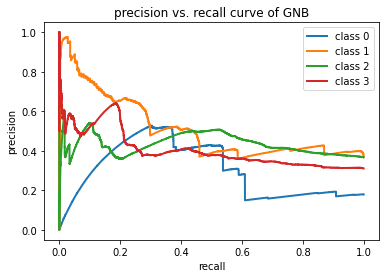

In [ ]:
#Precision-Recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve of GNB")
plt.show()


# ROC Curve

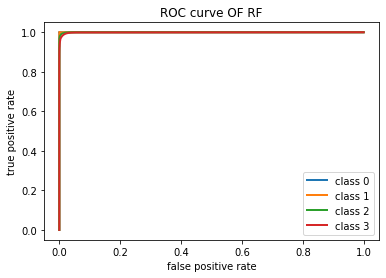

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.figure(figsize=(6,4))
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve OF RF")
plt.show()

# Hyperparameter tuning

In [ ]:
x=df_med.drop(['side_effect'],axis=1)
y=df_med['side_effect']
  #X_smot,y_smot=smot.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
  

# Grid search for finding best parameter for random forest

In [ ]:
param_grid = {'min_samples_split': [2,4,6,7,8,9,10,11,12,15,25,30,50],
              'min_samples_leaf':[0.2,0.4,0.5],
              'max_depth':[5,6,7,8,9,10,11,12,13,14,15,20,25,50,110,120,130,200],
              'n_estimators': [50,65,80,100,115,130,150],
              'max_leaf_nodes': [2,4,6,10,15,25,30,45,60,100,200],
              'max_features': ['auto', 'sqrt','log2']
}
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 162162 candidates, totalling 810810 fits


##Hyper parameter tuning

In [ ]:
from tqdm import tqdm
import time

from sklearn.model_selection import cross_val_score

In [ ]:
! pip install  scikit-optimize

     |████████████████████████████████| 100 kB 5.0 MB/s 


In [ ]:
import matplotlib as mpl

from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve

#selected plotting functions
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from copy import deepcopy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
rf=RandomForestClassifier()
xg=XGBClassifier()
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
%%time

#dictionary for collecting results
results_dict = {}

#obtaining default parameters by calling .fit() to XGBoost model instance
rf0 = RandomForestClassifier(bootstrap=True,  
                          criterion='entropy',
                          )
y = y.astype(np.uint8)
n_classes = len(set(y))
target=df_med['side_effect']
Y = label_binarize(target, classes=[*range(n_classes)])

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    Y,
                                                    random_state = 42)

clf = OneVsRestClassifier(rf0)
clf.fit(x_train, y_train)

#y_score = clf.predict_proba(x_test)
print(n_classes)
#rf0.fit(x_train , y_train)

#extracting default parameters from benchmark model
default_params = {}
gparams = clf.get_params()

#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

#benchmark model. Grid search is not performed, since only single values are provided as parameter grid.
#However, cross-validation is still executed
clf0 = GridSearchCV(estimator=rf0, scoring='accuracy', param_grid=default_params, return_train_score=True, verbose=1, cv=3)
clf0.fit(x_train, y_train.ravel())

#results dataframe
df = pd.DataFrame(clf0.cv_results_)

#predictions - inputs to confusion matrix
train_predictions = clf0.predict(x_train)
test_predictions = clf0.predict(x_test)
#unseen_predictions = clf0.predict(df_test.iloc[:,1:])

#confusion matrices
cfm_train = confusion_matrix(y_train, train_predictions)
cfm_test = confusion_matrix(y_test, test_predictions)
#cfm_unseen = confusion_matrix(df_test.iloc[:,:1], unseen_predictions)

#accuracy scores
accs_train = accuracy_score(y_train, train_predictions)
accs_test = accuracy_score(y_test, test_predictions)
#accs_unseen = accuracy_score(df_test.iloc[:,:1], unseen_predictions)

#F1 scores for each train/test label
f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1,average='samples')
f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0,average='samples')
f1s_test_p1 = f1_score(y_test, test_predictions, pos_label=0,average='samples')
f1s_test_p0 = f1_score(y_test, test_predictions, pos_label=1,average='samples')
f1s_train_p2 = f1_score(y_train, train_predictions, pos_label=2,average='samples')
f1s_train_p3 = f1_score(y_train, train_predictions, pos_label=3,average='samples')
f1s_test_p2 = f1_score(y_test, test_predictions, pos_label=2,average='samples')
f1s_test_p3 = f1_score(y_test, test_predictions, pos_label=3,average='samples')
#f1s_unseen_p1 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=1)
#f1s_unseen_p0 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=0)

#Area Under the Receiver Operating Characteristic Curve
test_ras = roc_auc_score(y_test, clf0.predict_proba(x_test)[:,1])
#unseen_ras = roc_auc_score(df_test.iloc[:,:1], clf0.predict_proba(df_test.iloc[:,1:])[:,1])

#best parameters
bp = clf0.best_params_

#storing computed values in results dictionary
results_dict['rf0'] = {'iterable_parameter': np.nan,
                         'classifier': deepcopy(clf0),
                         'cv_results': df.copy(),
                         'cfm_train': cfm_train,
                         'cfm_test': cfm_test,
                         
                         'train_accuracy': accs_train,
                         'test_accuracy': accs_test,
                         
                         'train F1-score label 1': f1s_train_p1,
                         'train F1-score label 0': f1s_train_p0,
                         'train F1-score label 2': f1s_train_p2,
                         'train F1-score label 3': f1s_train_p3,
                         'test F1-score label 1': f1s_test_p1,
                         'test F1-score label 0': f1s_test_p0,
                         'test F1-score label 1': f1s_test_p2,
                         'test F1-score label 0': f1s_test_p3,
                         
                         'test roc auc score': test_ras,
                         
                         'best_params': bp}

4


ValueError: ignored

In [ ]:
#creating deepcopy of default parameters before manipulations
params = deepcopy(default_params)

#setting grid of selected parameters for iteration
param_grid = {'min_samples_split': [2,4,6,7,8,9,10,11,12,15,25,30,50],
              'min_samples_leaf': [0.2,0.4,0.5],
              'max_depth': [5,6,7,8,9,10,11,12,13,14,15,20,25,50,110,120,130,200],
              'n_estimators': [50,65,80,100,115,130,150],
              'max_leaf_nodes': [2,4,6,10,15,25,30,45,60,100,200],
              'max_features': ['auto', 'sqrt','log2']
              }

In [ ]:
#start time
t0 = time.time()
#No. of jobs
gcvj = np.cumsum([len(x) for x in param_grid.values()])[-1]

#iteration loop. Each selected parameter iterated separately
for i,grid_key in enumerate(param_grid.keys()):
    
    #variable for measuring iteration time
    loop_start = time.time()
       
    #creating param_grid argument for GridSearchCV:
    #listing grid values of current iterable parameter and wrapping non-iterable parameter single values in list
    for param_key in params.keys():
        if param_key == grid_key:
            params[param_key] = param_grid[grid_key]
        else:
            #use best parameters of last iteration
            try:
                param_value = [clf.best_params_[param_key]]
                params[param_key] = param_value
            #use benchmark model parameters for first iteration
            except:
                param_value = [clf0.best_params_[param_key]]
                params[param_key] = param_value
    
    #classifier instance of current iteration
    rfc = RandomForestClassifier(**default_params)
    
    #GridSearch instance of current iteration
    clf = GridSearchCV(estimator=rfc, param_grid=params, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
    clf.fit(X_train, y_train.values.ravel())
    
    #results dataframe
    df = pd.DataFrame(clf.cv_results_)
    
    #predictions - inputs to confusion matrix
    train_predictions = clf.predict(x_train)
    test_predictions = clf.predict(x_test)
    #unseen_predictions = clf.predict(df_test.iloc[:,1:])
    
    #confusion matrices
    cfm_train = confusion_matrix(y_train, train_predictions)
    cfm_test = confusion_matrix(y_test, test_predictions)
    #cfm_unseen = confusion_matrix(df_test.iloc[:,:1], unseen_predictions)
    
    #accuracy scores
    accs_train = accuracy_score(y_train, train_predictions)
    accs_test = accuracy_score(y_test, test_predictions)
    #accs_unseen = accuracy_score(df_test.iloc[:,:1], unseen_predictions)
    
    #F1 scores for each train/test label
    f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
    f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
    f1s_train_p2 = f1_score(y_train, train_predictions, pos_label=2)
    f1s_train_p3 = f1_score(y_train, train_predictions, pos_label=3)
    f1s_test_p1 = f1_score(y_test, test_predictions, pos_label=1)
    f1s_test_p0 = f1_score(y_test, test_predictions, pos_label=0)
    f1s_test_p2 = f1_score(y_test, test_predictions, pos_label=2)
    f1s_test_p3 = f1_score(y_test, test_predictions, pos_label=3)
    #f1s_unseen_p1 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=1)
    #f1s_unseen_p0 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=0)
    
    #Area Under the Receiver Operating Characteristic Curve
    test_ras = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
    #unseen_ras = roc_auc_score(df_test.iloc[:,:1], clf.predict_proba(df_test.iloc[:,1:])[:,1])
    
    #best parameters
    bp = clf.best_params_
    
    #storing computed values in results dictionary
    results_dict[f'rfc{i+1}'] = {'iterable_parameter': grid_key,
                                  'classifier': deepcopy(clf),
                                  'cv_results': df.copy(),
                                  'cfm_train': cfm_train,
                                  'cfm_test': cfm_test,
                                  
                                  'train_accuracy': accs_train,
                                  'test_accuracy': accs_test,
                                  
                                  'train F1-score label 1': f1s_train_p1,
                                  'train F1-score label 0': f1s_train_p0,
                                  'train F1-score label 2': f1s_train_p2,
                                  'train F1-score label 3': f1s_train_p3,
                                  'test F1-score label 1': f1s_test_p1,
                                  'test F1-score label 0': f1s_test_p0,
                                  'test F1-score label 2': f1s_test_p2,
                                  'test F1-score label 3': f1s_test_p3,
                                  
                                  'test roc auc score': test_ras,
                                  
                                  'best_params': bp}
    
    #variable for measuring iteration time
    elapsed_time = time.time() - loop_start
    print(f'iteration #{i+1} finished in: {elapsed_time} seconds')

#stop time
t1 = time.time()

#elapsed time
gcvt = t1 - t0

#plotting the result

In [ ]:
#number of rows depend on number of iterations
nrows = len(results_dict.keys())

#standard group names for confusion matrices
group_names = ['True','False','False','False','False','True','False','False','False','False','True','False','False','False','False','True']

#creating figure
f, axes = plt.subplots(nrows,2,figsize=(18,8*nrows));

#iteratively plotting train/test accuracy scores and test confusion matrix
for i,ax in enumerate(axes):
    
    #current key of results dictionary
    ckey = list(results_dict.keys())[i] 
    
    #plotting scores for models other than the benchark model
    if ckey != 'rf0':
        x1 = results_dict[ckey]['cv_results'].loc[:,'mean_train_score']
        x2 = results_dict[ckey]['cv_results'].loc[:,'mean_test_score']
        
        ax[0].plot(x1, label='train scores', color='blue');
        ax[0].plot(x2, label='test scores', color='red');
        ax[0].set_title(f'Iteration #{i+1} results');
               
        ax[0].set_xticks(list(range(0,len([x[results_dict[ckey]['iterable_parameter']] for x in results_dict[ckey]['cv_results']['params']]))));
        ax[0].set_xticklabels(sorted([x[results_dict[ckey]['iterable_parameter']] for x in results_dict[ckey]['cv_results']['params']]));
    
        ax[0].grid('major');
        ax[0].legend();
        ax[0].set_xlabel(results_dict[ckey]['iterable_parameter'])
        ax[0].set_ylabel('mean score');
    
    #leaving scores plot blank for benchmark model
    else:
        ax[0].axis('off')
        ax[0].text(x=0.5, y=0.5, s='No iteration has been performed', fontsize=16, va='center', ha='center')
    
    #computing variables for specific confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in results_dict[ckey]['cfm_test'].flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in results_dict[ckey]['cfm_test'].flatten()/np.sum(results_dict[ckey]['cfm_test'])]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(4,4)
    
    #plotting confusion matrix
    sns.heatmap(results_dict[ckey]['cfm_test'], annot=labels, fmt='', cmap='Greens', ax=ax[1])
    
plt.show();